In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import matplotlib.colors as cl


In [2]:
#a

theta=np.random.uniform(0,2*math.pi,100)
U1 = np.random.normal(0, 1, 100)
U2 = np.random.normal(0, 1, 100)
V1 = np.random.normal(0, 1, 100)
V2 = np.random.normal(0, 1, 100)

In [3]:
X11 = np.array([8*math.cos(t)+u1 for t, u1 in zip(theta, U1)])
X12 = np.array([8*math.sin(t)+u2 for t, u2 in zip(theta, U2)])

In [4]:
X1 = np.column_stack((X11, X12))
X2 = np.column_stack((V1, V2))
X = np.concatenate((X1, X2))

In [6]:
t1 = np.ones((100,1), dtype=np.int)
t2 = -1*t1
t = np.concatenate((t1, t2))

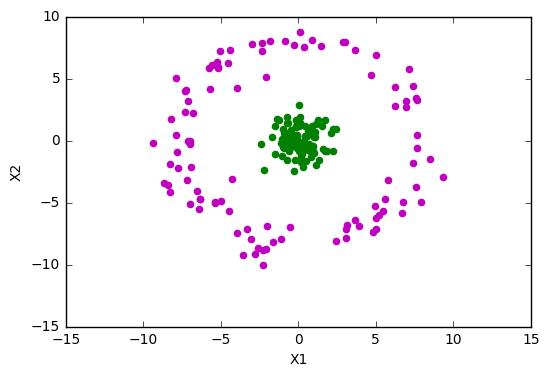

In [14]:
fig = plt.figure()
plt.scatter(X1[:,0],X1[:,1], color='m')
plt.scatter(X2[:,0],X2[:,1], color='g')
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(ctr, inline=1, fontsize=10) 
plt.show()

In [8]:
#Functions for Kernels

def k_poly(x1, x2):
    return math.pow((1+np.dot(x1, x2)),2)

def k_exp(x1,x2,gamma):
    nor = np.linalg.norm(x1 - x2)
    k = np.exp(-gamma*np.square(nor))
    return k

In [9]:
# Polynomial kernel k(x,y)=(1+xTy)^2
K_pol = [k_poly(X[i,:],X[j,:]) for i in range(0,200) for j in range(0,200)]
K_pol = np.asarray(K_pol).reshape(200,200)
I = np.identity(200, dtype=float)

#Z 
lmbda = 1e-6

z = np.linalg.solve(K_pol+lmbda*I, t)

In [10]:
#  prediction
pred = np.asarray([sum(k_poly(X[j,:],X[i,:])*z[i] for i in range(0,200)) for j in range(0,200)])

In [11]:
# Change from real value to class -1 and 1
pred = np.asarray([-1 if pred[i]<=0 else 1 for i in range(0,200)]).reshape(200,1)
accuracy = (pred==t).sum()/200.0

In [12]:
xl = np.linspace(-12.0, 12.0, 100)
yl = np.linspace(-12.0, 12.0, 100)
xi, yi = np.meshgrid(xl, yl)
xi = xi.reshape(10000, 1)
yi = yi.reshape(10000, 1)

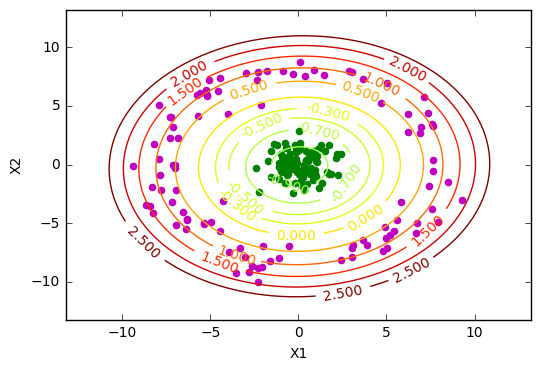

In [15]:
Xplot = np.column_stack((xi,yi))
pred_plot = np.asarray([sum(k_poly(Xplot[j,:],X[i,:])*z[i] for i in range(0,200)) for j in range(0,10000)])

fig = plt.figure()
ctr = plt.contour(xi.reshape(100,100), yi.reshape(100,100), pred_plot.reshape(100,100), 
                  vmin=-5, levels = [-0.9,-0.7, -0.5, -0.3, 0,0.5,1,1.5,2,2.5])
plt.clabel(ctr, inline=1, fontsize=10) 
plt.scatter(X1[:,0],X1[:,1], color='m')
plt.scatter(X2[:,0],X2[:,1], color='g')
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(ctr, inline=1, fontsize=10) 
plt.show()

In [20]:
#c
gamma = 10
K_gauss = np.array([k_exp(X[i,:],X[j,:],gamma) for i in range(0,200) for j in range(0,200)])
K_gauss = K_gauss.reshape(200,200)



In [25]:
z = np.linalg.solve((K_gauss + lmbda*np.identity(len(K_gauss))),t)
output = np.array([sum(k_exp(X[j,:],X[i,:],gamma)*z[i] for i in range(0,200)) for j in range(0,200)])
prediction = np.array([-1 if val <0 else 1 for val in output])
accuracy = (prediction == t).sum()/len(prediction)
print ("Accuracy is: ", accuracy)

Accuracy is: 100.0


In [27]:
output = np.array([sum(k_exp(xxyy[j,:],X[i,:],gamma)*z[i] for i in range(0,200)) for j in range(0,10000)])

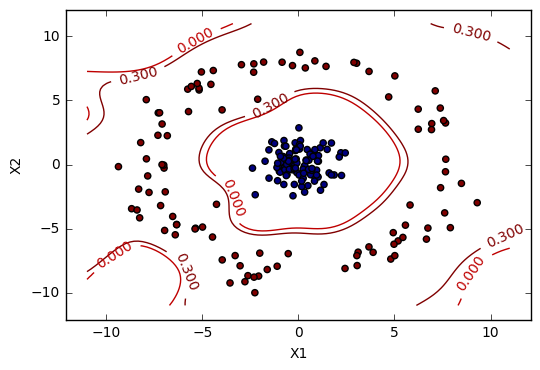

In [42]:
ctr = plt.contour(xx.reshape(100,100), yy.reshape(100,100), output.reshape(100,100), 
                  vmin=-5, levels = [0,0.3])
cmap, norm = cl.from_levels_and_colors([1, -1, 0],['blue', 'green'])

plt.scatter(X[:,0],X[:,1], c = t, )
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(ctr, inline=1, fontsize=10) 
plt.show()

In [34]:
gamma = 0.1
K = np.array([k_exp(X[i,:],X[j,:],gamma) for i in range(0,200) for j in range(0,200)])
K = K.reshape(200,200)
z = np.linalg.solve((K + lmbda*np.identity(len(K))),t)
output = np.array([sum(k_exp(X[j,:],X[i,:],gamma)*z[i] for i in range(0,200)) for j in range(0,200)])
prediction = np.array([-1 if val <0 else 1 for val in output])
accuracy = (prediction == t).sum()/len(prediction)
print ("Accuracy is",accuracy)

Accuracy is 100.0


In [35]:
#plot
output = np.array([sum(k_exp(xxyy[j,:],X[i,:],gamma)*z[i] for i in range(0,200)) for j in range(0,10000)])

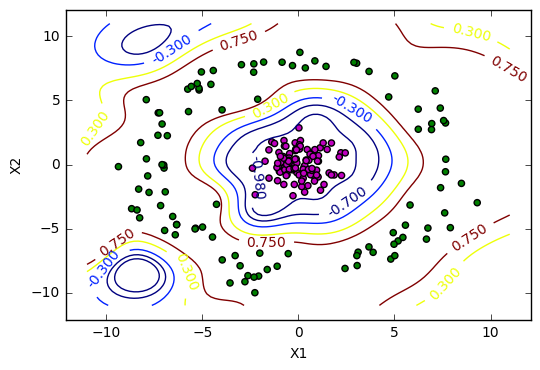

In [41]:
ctr = plt.contour(xx.reshape(100,100), yy.reshape(100,100), output.reshape(100,100),
                  levels = [-0.98,-0.7, -0.3,0.3,0.75], vmin = -0.5)
cmap, norm = cl.from_levels_and_colors([1, -1, 0],['m', 'green'])
plt.scatter(X[:,0],X[:,1], c = t, cmap = cmap)
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(ctr, inline=1, fontsize=10) 
plt.show()

In [43]:
gamma = 0.001
K = np.array([k_exp(X[i,:],X[j,:],gamma) for i in range(0,200) for j in range(0,200)])
K = K.reshape(200,200)
z = np.linalg.solve((K + lmbda*np.identity(len(K))),t)
output = np.array([sum(k_exp(X[j,:],X[i,:],gamma)*z[i] for i in range(0,200)) for j in range(0,200)])
prediction = np.array([-1 if val <0 else 1 for val in output])
accuracy = (prediction == t).sum()/len(prediction)
print ("Accuracy is",accuracy)

Accuracy is 100.0


In [44]:
output = np.array([sum(k_exp(xxyy[j,:],X[i,:],gamma)*z[i] for i in range(0,200)) for j in range(0,10000)])

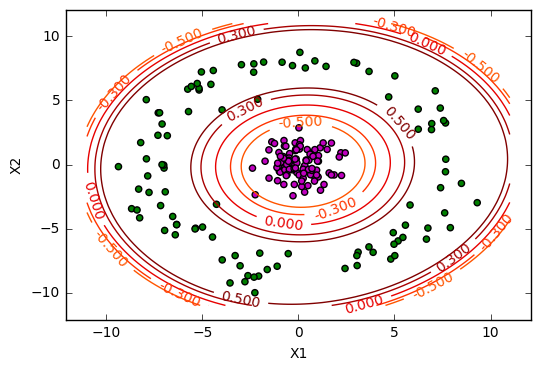

In [46]:
ctr = plt.contour(xx.reshape(100,100), yy.reshape(100,100), output.reshape(100,100), 
                  vmin=-5, levels = [ -0.5, -0.3, 0,0.3,0.5])
cmap, norm = cl.from_levels_and_colors([1, -1, 0],['m', 'green'])
plt.scatter(X[:,0],X[:,1], c = t, cmap = cmap)
plt.xlabel('X1')
plt.ylabel('X2')
plt.clabel(ctr, inline=1, fontsize=10) 
plt.show()

## Q6

In [51]:
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn import linear_model

from mnist import MNIST
from sklearn.preprocessing import OneHotEncoder


In [3]:
def dataload():
    mnistdata = MNIST('./data/')
    X_train, y_train = map(np.array, mnistdata.load_training())
    X_test, y_test = map(np.array, mnistdata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    X_train = np.asarray(X_train).reshape(60000, 784)
    y_train = np.asarray(y_train).reshape(60000, 1)
    X_test = np.asarray(X_test).reshape(10000, 784)
    y_test = np.asarray(y_test).reshape(10000, 1)
    return X_train, y_train, X_test, y_test
def plot(x):
    image = x.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [13]:
if __name__ == "__main__":

    X_train, y_train, X_test, y_test = dataload()
    enc= OneHotEncoder()
    enc.fit(y_train)
    y_train_new = enc.transform(y_train).toarray()
    alphas = np.linspace(0.2, 200)
    #RIDGECV
    lm = linear_model.RidgeCV(alphas=alphas,store_cv_values=True).fit(X_train, y_train_new)
    prediction = lm.predict(X_test)
    
    prediction_train = lm.predict(X_train)
    pred_labels_test = np.argmax(prediction, axis = 1)
    pred_labels_test.reshape(10000,1)
    pred_labels_train = np.argmax(prediction_train, axis = 1)
    pred_labels_train.reshape(60000,1)

print("Train accuracy: {0}".format(metrics.accuracy_score(y_train, pred_labels_train)))

print("Test accuracy: {0}".format(metrics.accuracy_score(y_test,pred_labels_test)))
print ("alphas:", alphas)

    

Train accuracy: 0.8571166666666666
Test accuracy: 0.8619
alphas: [   0.2           4.27755102    8.35510204   12.43265306   16.51020408
   20.5877551    24.66530612   28.74285714   32.82040816   36.89795918
   40.9755102    45.05306122   49.13061224   53.20816327   57.28571429
   61.36326531   65.44081633   69.51836735   73.59591837   77.67346939
   81.75102041   85.82857143   89.90612245   93.98367347   98.06122449
  102.13877551  106.21632653  110.29387755  114.37142857  118.44897959
  122.52653061  126.60408163  130.68163265  134.75918367  138.83673469
  142.91428571  146.99183673  151.06938776  155.14693878  159.2244898
  163.30204082  167.37959184  171.45714286  175.53469388  179.6122449
  183.68979592  187.76734694  191.84489796  195.92244898  200.        ]


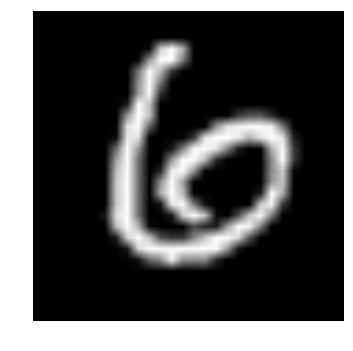

In [6]:
#==== Plot first mis-classified data ====
    # (Use the provided plot(x) function)
misclassified_point = np.where(np.any(y_test != pred_labels_test.reshape(10000,1), axis=1))[0][0]
plot(X_test[misclassified_point])

In [7]:
print ("Predicted label is:", pred_labels_test[misclassified_point])
print ("True label is:", y_test[misclassified_point])

Predicted label is: 4
True label is: [6]


# Q7

In [61]:
def dataload():
    mnistdata = MNIST('./data/')
    X_train, y_train = map(np.array, mnistdata.load_training())
    X_test, y_test = map(np.array, mnistdata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    X_train = np.asarray(X_train).reshape(60000, 784)
    y_train = np.asarray(y_train).reshape(60000, 1)
    X_test = np.asarray(X_test).reshape(10000, 784)
    y_test = np.asarray(y_test).reshape(10000, 1)
    return X_train, y_train, X_test, y_test

def plot(x):
    image = x.reshape(28, 28)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

In [62]:
if __name__ == "__main__":
    X_train, y_train, X_test, y_test = dataload()
    enc= OneHotEncoder()
    enc.fit(y_train)
    y_train_new = enc.transform(y_train).toarray()

In [63]:
np.random.seed(10)
G = np.random.normal(0,0.1,3920000).reshape(784,5000)
pi = math.pi
b = np.random.uniform(0,2*pi,5000)

In [64]:
tmp = np.array([np.matmul(np.transpose(G),val)+b for val in X_train])
phi_x = np.vectorize(math.cos)(tmp)
alphas = np.linspace(0.1,1,10)
#RIDGECV
lm = linear_model.RidgeCV(alphas=(alphas),store_cv_values=True).fit(phi_x, y_train_new)

In [65]:
tmp = np.array([np.matmul(np.transpose(G),val)+b for val in X_test])
phi_x_test = np.vectorize(math.cos)(tmp)

In [66]:
X_test.shape
prediction = lm.predict(phi_x_test)
    
prediction_train = lm.predict(phi_x)
pred_labels_test = np.argmax(prediction, axis = 1) 
pred_labels_train = np.argmax(prediction_train, axis = 1)

print("Train accuracy: ",(metrics.accuracy_score(y_train, pred_labels_train)))

print("Test accuracy:",(metrics.accuracy_score(y_test,pred_labels_test)))


Train accuracy:  0.98335
Test accuracy: 0.9726


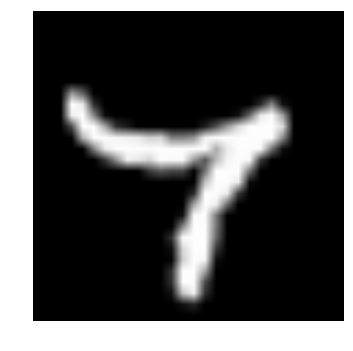

In [67]:
misclassified_point = np.where(np.any(y_test != pred_labels_test.reshape(10000,1), axis=1))[0][0]
plot(X_test[misclassified_point])

In [68]:
print ("Predicted label is:", pred_labels_test[misclassified_point])
print ("True label is:", y_test[misclassified_point])

Predicted label is: 4
True label is: [7]
